<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 10px;"> Introduction</p>
</div>    

<div style="font-family:verdana; word-spacing:1.5px;">
    
<b>Objective</b><br>
    
Target is one of the world’s most recognized brands and one of America’s leading retailers. Target makes itself a preferred shopping destination by offering outstanding value, inspiration, innovation and an exceptional guest experience that no other retailer can deliver.

This business case has information of 100k orders from 2016 to 2018 made at Target in Brazil. Its features allows viewing an order from multiple dimensions: from order status, price, payment and freight performance to customer location, product attributes and finally reviews written by customers.     
    
We have to draw insights and provide recommendations based on data for online shopping from the Target's E-commerce platform about its customers in Brazil.
<br>   
    
<b>About the Dataset</b>   <br>
We are provided with the information of customers purchasing items from an online platform in Brazil.
    <br>
    Working as a data scientist with the analytics vertical of Target, we got this dataset from the Target's database.<br><br>
      The database contains following tables:
    <ul>
     <li> customers.csv
 <li>   geolocation.csv
 <li>   order_items.csv 
 <li>   payments.csv 
 <li>   reviews.csv 
 <li>   orders.csv 
 <li>   products.csv
 <li>   sellers.csv 

</ul><br>
<br><br>
    
<b>Concept Used :</b><br>
<ul>
    <li> pandas 
    <li> EDA
    <li> SQL - joins
    <li> Data Cleaning
</ul>

</div>  

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
from matplotlib import pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/target-sql-data/Target- SQL Business Case/products.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/geolocation.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/order_items.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/orders.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/customers.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/sellers.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/payments.csv
/kaggle/input/target-sql-data/Target- SQL Business Case/order_reviews.csv


<div style="font-family:verdana; word-spacing:0.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 2px;"> Checking Data</p>
</div>    

In [2]:
#####
##
## Products csv
##

df_products = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/products.csv")
display(df_products.head())
rows,cols = df_products.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_products.isna().sum())
print()
display(df_products.info())


,product_id,product category,product_name_length,product_description_length,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,Art,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,sport leisure,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,babies,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,housewares,37.0,402.0,4.0,625.0,20.0,17.0,13.0


No. of rows:  32951  , No. of columns 9



product_id                      0
product category              610
product_name_length           610
product_description_length    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product category            32341 non-null  object 
 2   product_name_length         32341 non-null  float64
 3   product_description_length  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


None

In [3]:
#####
##
## Orders csv
##

df_orders = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/orders.csv")
display(df_orders.head())
rows,cols = df_orders.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_orders.isna().sum())
print()
display(df_orders.info())

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


No. of rows:  99441  , No. of columns 8



order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


None

In [4]:
#####
##
## Order_items. csv
##

df_order_items = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/order_items.csv")
display(df_order_items.head())
rows,cols = df_order_items.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_order_items.isna().sum())
print()
display(df_order_items.info())

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


No. of rows:  112650  , No. of columns 7



order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


None

In [5]:
#####
##
## Order_reviews. csv
##

df_order_reviews = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/order_reviews.csv", encoding = "ISO-8859-1")
display(df_order_reviews.head())
rows,cols = df_order_reviews.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_order_reviews.isna().sum())
print()
display(df_order_reviews.info())

,review_id,order_id,review_score,review_comment_title,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,18/01/18 0:00,18/01/18 21:46
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,10/03/18 0:00,11/03/18 3:05
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,17/02/18 0:00,18/02/18 14:36
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,21/04/17 0:00,21/04/17 22:02
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,01/03/18 0:00,02/03/18 10:26


No. of rows:  99224  , No. of columns 6



review_id                      0
order_id                       0
review_score                   0
review_comment_title       87675
review_creation_date           0
review_answer_timestamp        0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 6 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11549 non-null  object
 4   review_creation_date     99224 non-null  object
 5   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(5)
memory usage: 4.5+ MB


None

In [6]:
#####
##
## sellers. csv
##


df_sellers = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/sellers.csv")
display(df_sellers.head())
rows,cols = df_sellers.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_sellers.isna().sum())
print()
display(df_sellers.info())

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


No. of rows:  3095  , No. of columns 4



seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


None

In [7]:
#####
##
## Payments csv
##

df_payments = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/payments.csv")
display(df_payments.head())
rows,cols = df_payments.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_payments.isna().sum())
print()
display(df_payments.info())

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


No. of rows:  103886  , No. of columns 5



order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


None

In [8]:
#####
##
## geolocation csv
##


df_geolocation = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/geolocation.csv")
display(df_geolocation.head())
rows,cols = df_geolocation.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_geolocation.isna().sum())
print()
display(df_geolocation.info())

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


No. of rows:  1000163  , No. of columns 5



geolocation_zip_code_prefix    0
geolocation_lat                0
geolocation_lng                0
geolocation_city               0
geolocation_state              0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


None

In [9]:
#####
##
## customers csv
##

df_customers = pd.read_csv("/kaggle/input/target-sql-data/Target- SQL Business Case/customers.csv")
display(df_customers.head())
rows,cols = df_customers.shape
print("No. of rows: ",rows, " , No. of columns",cols)
print()
display(df_customers.isna().sum())
print()
display(df_customers.info())

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


No. of rows:  99441  , No. of columns 5



customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


None

<div style="font-family:verdana; word-spacing:1.5px;">
<p style="background-color:#0cd734;color:white;text-align:center;font-size:175%;padding: 10px;"> Answering questions</p>
</div>    

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Q. States and cities
    </p>
    </div>

In [10]:
#############
##
#
#
# Cities Info
#

print("Total cities in customers table", df_customers['customer_city'].nunique())
print()
print("Examples Cities : ")
print(df_customers['customer_city'].unique())
print()
print("Total states in customers table", df_customers['customer_state'].nunique())
print()
print("Examples States : ")
print(df_customers['customer_state'].unique())

Total cities in customers table 4119

Examples Cities : 
['franca' 'sao bernardo do campo' 'sao paulo' ... 'monte bonito'
 'sao rafael' 'eugenio de castro']

Total states in customers table 27

Examples States : 
['SP' 'SC' 'MG' 'PR' 'RJ' 'RS' 'PA' 'GO' 'ES' 'BA' 'MA' 'MS' 'CE' 'DF'
 'RN' 'PE' 'MT' 'AM' 'AP' 'AL' 'RO' 'PB' 'TO' 'PI' 'AC' 'SE' 'RR']


In [11]:
#############
##
#
#
# States Info
#

print("Total cities in sellers table", df_sellers['seller_city'].nunique())
print()
print("Examples Cities : ")
print(df_sellers['seller_city'].unique())
print()
print("Total states in sellers table", df_sellers['seller_state'].nunique())
print()
print("Examples States : ")
print(df_sellers['seller_state'].unique())

Total cities in sellers table 611

Examples Cities : 
['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo antonio da patrulha'
 'ponta grossa' 'santana de parnaiba' 'sao carlos' 'ibitinga' 'barueri'
 'caxias do sul' 'araguari' 'contagem' 'jaragua do sul' 'lages - sc'
 'bento goncalves' 'catanduva' 'ribeirao pires' 'jaboticabal' 'echapora'
 'cotia' 'rio do sul' 'sorocaba' 'pradopolis' 'itaborai' 'mirassol'
 'birigui' 'assis' 'jaguariuna' 'araraquara' 'macae' 'rio claro'
 'londrina' 'ribeirao preto' 'tres coracoes' '

In [12]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
print("Orders we're considering here are placed between {} and {}".format(df_orders.order_purchase_timestamp.min().date().strftime('%B-%Y'), df_orders.order_purchase_timestamp.max().date().strftime('%B-%Y')))



Orders we're considering here are placed between September-2016 and October-2018


In [13]:
#How many orders do we have for each order status?

df_orders.groupby(['order_status']).count()['order_id']

order_status
approved           2
canceled         625
created            5
delivered      96478
invoiced         314
processing       301
shipped         1107
unavailable      609
Name: order_id, dtype: int64

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Q. Is there a growing trend on e-commerce in Brazil?  How can we describe a complete scenario? <br> Can we see some seasonality with peaks at specific months? 
    </p>
    </div>

Answer: We can observe how e-commerce is growing based on number of orders placed by customers and total payment recieved monthwise.

[]

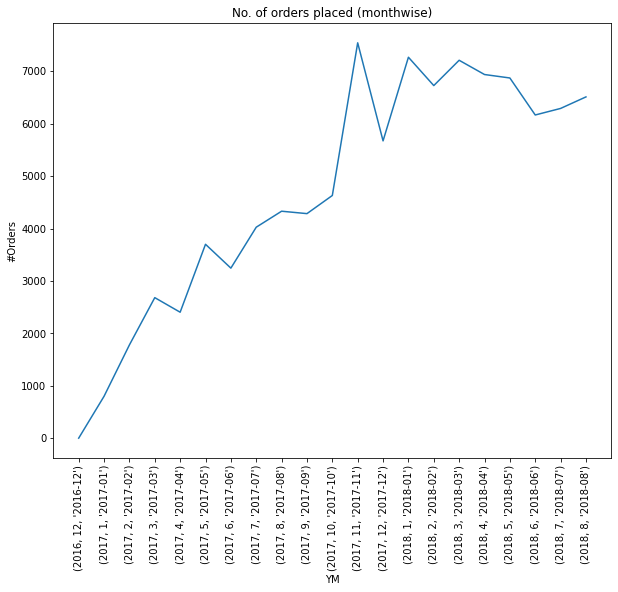

In [14]:

df_tmp = df_orders.copy()
df_tmp["YM"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%Y-%m')
df_tmp["Year"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.year
df_tmp["Month"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.month

df_tmp = df_tmp.groupby(['Year','Month','YM']).count()['order_id']
df_tmp.drop(df_tmp.tail(2).index,inplace=True)
df_tmp.drop(df_tmp.head(2).index,inplace=True)
ax = df_tmp.plot(title="No. of orders placed (monthwise)",figsize=(10,8))
ax.set_xlabel("YM")
ax.set_ylabel("#Orders")
ax.set_xticks(range(len(df_tmp.index)));
ax.set_xticklabels([item for item in df_tmp.index.tolist()], rotation=90)

plt.plot()

As visible above, the number of orders increasing every month which suggests that business is growing.

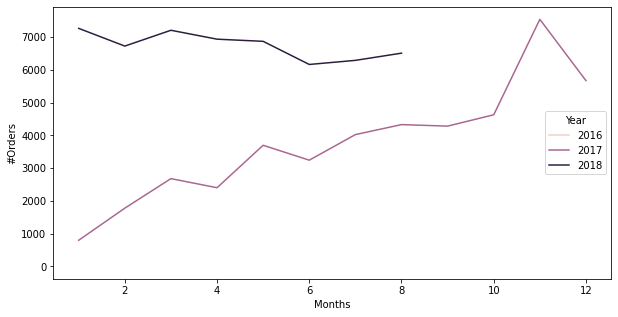

In [15]:
df_tmp = df_tmp.reset_index()

fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_tmp,y='order_id',x='Month',hue='Year',ax=ax)
ax.set_xlabel("Months")
ax.set_ylabel("#Orders")
plt.show()

As visible above, the number of orders for same month in 2018 and 2017 differ significantly, which suggests that business is growing at almost 2X times.

[]

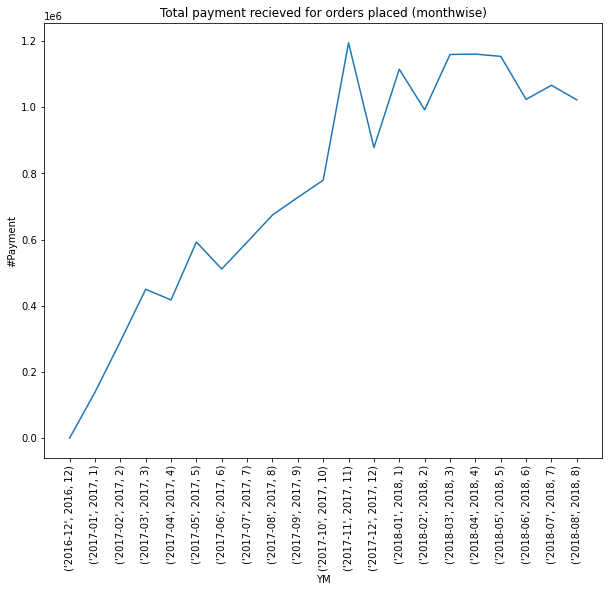

In [16]:
df_tmp = df_orders.copy()
df_tmp["YM"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%Y-%m')
df_tmp["Year"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.year
df_tmp["Month"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.month

df_tmp = df_tmp.merge(df_payments,on='order_id',how='right')
df_tmp = df_tmp.groupby(['YM','Year','Month']).sum()['payment_value']

df_tmp.drop(df_tmp.tail(2).index,inplace=True)
df_tmp.drop(df_tmp.head(2).index,inplace=True)
ax = df_tmp.plot(title="Total payment recieved for orders placed (monthwise)",figsize=(10,8))
ax.set_xlabel("YM")
ax.set_ylabel("#Payment")
ax.set_xticks(range(len(df_tmp.index)));
ax.set_xticklabels([item for item in df_tmp.index.tolist()], rotation=90)
plt.plot()

As visible above, the total payment recieved increasing every month which suggests that business is growing.

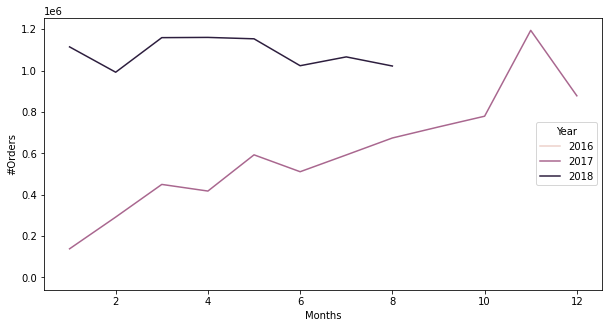

In [17]:
df_tmp = df_tmp.reset_index()
fig, ax = plt.subplots(figsize=(10, 5))
sns.lineplot(data=df_tmp,y='payment_value',x='Month',hue='Year',ax=ax)
ax.set_xlabel("Months")
ax.set_ylabel("#Orders")
plt.show()

As visible above, the total payment recieved for same month in 2018 and 2017 differ significantly, which suggests that business is growing at almost 2X times.

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Q. On what day of week brazilians customers tend to do online purchasing?
    </p>
    </div>

[]

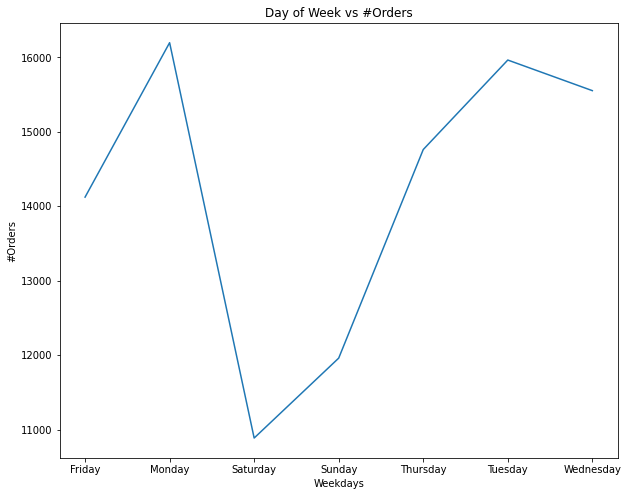

In [18]:
#On what day of week brazilians customers tend to do online purchasing?

df_tmp = df_orders.copy()
df_tmp["weekday"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%A')
df_tmp = df_tmp.groupby(['weekday']).count()['order_id']
ax = df_tmp.plot(title="Day of Week vs #Orders",figsize=(10,8))
ax.set_xlabel("Weekdays")
ax.set_ylabel("#Orders")
plt.plot()

Answer : [Monday, Tuesday, Wednesday]

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Q. Does the days when ppl shop most changes with year?
    </p>
    </div>

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

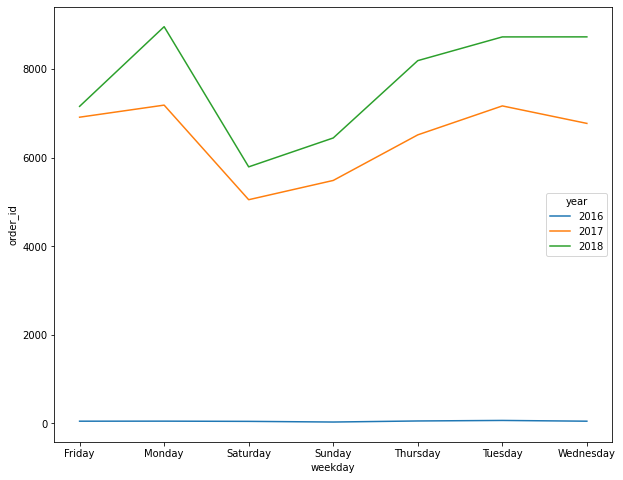

In [19]:
#Does the days when ppl shop most changes with year?

df_tmp = df_orders.copy()
df_tmp["weekday"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%A')
df_tmp["year"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%Y')

df_tmp = df_tmp.groupby(['weekday','year']).count()['order_id'].reset_index()

ax = plt.figure(figsize=(10,8))
sns.lineplot(df_tmp['weekday'],df_tmp['order_id'],hue=df_tmp['year'])
plt.plot()

Answer: No, it seems to be same for both 2017 & 2018

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Q. What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)? 
    </p>
    </div>

[]

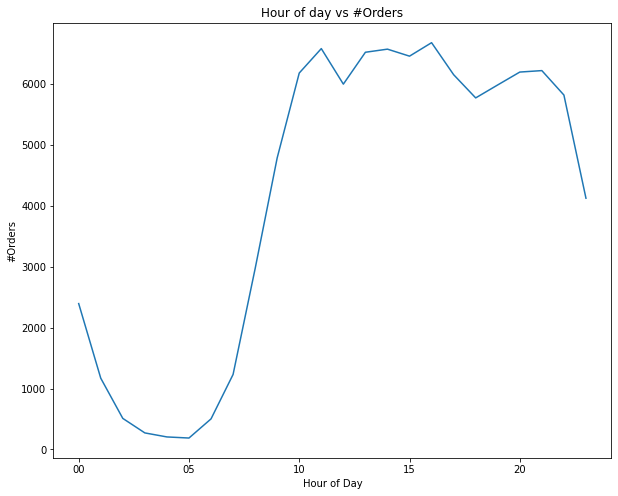

In [20]:
#What time do Brazilian customers tend to buy (Dawn, Morning, Afternoon or Night)? 
df_tmp = df_orders.copy()
df_tmp["hour"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%H')
df_tmp = df_tmp.groupby(['hour']).count()['order_id']
ax = df_tmp.plot(title="Hour of day vs #Orders",figsize=(10,8))
ax.set_xlabel("Hour of Day")
ax.set_ylabel("#Orders")

plt.plot()

Answer: Generally peak is Betwen 9 AM to 9 PM, and highest peak is between 9 AM to 3 PM.

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


[]

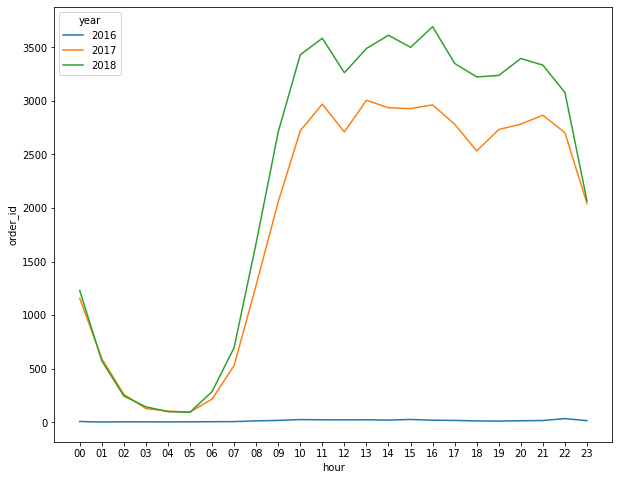

In [21]:
#Does the time when ppl shop most changes with year?
df_tmp = df_orders.copy()
df_tmp["hour"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%H')
df_tmp["year"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%Y')

df_tmp = df_tmp.groupby(['hour','year']).count()['order_id'].reset_index()

ax = plt.figure(figsize=(10,8))
sns.lineplot(df_tmp['hour'],df_tmp['order_id'],hue=df_tmp['year'])
plt.plot()

Answer: No, its same for both years.

In [22]:
#Feature Extraction
df_tmp = df_orders.copy()
df_tmp["order_purchase_year"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%Y')
df_tmp["order_purchase_month"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%B')
df_tmp["order_purchase_date"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%Y-%b-%d')
df_tmp["order_purchase_day"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%d')
df_tmp["order_purchase_dayofweek"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%w')
df_tmp["order_purchase_dayofweek_name"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%A')
df_tmp["order_purchase_hour"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%H')
df_tmp["order_purchase_time_day"] = pd.to_datetime(df_tmp['order_purchase_timestamp']).dt.strftime('%H-%M %d')

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Evolution of E-commerce orders in the Brazil region
    </p>
    </div>

In [23]:
#Evolution of E-commerce orders in the Brazil region
df_tmp = df_tmp.merge(df_customers,on='customer_id')


In [24]:
df_plt = df_tmp.groupby(['customer_state','order_purchase_month']).count()['order_id'].reset_index().fillna(0)


In [25]:
df_plt

,customer_state,order_purchase_month,order_id
0,AC,April,9
1,AC,August,7
2,AC,December,5
3,AC,February,6
4,AC,January,8
...,...,...,...
317,TO,March,28
318,TO,May,34
319,TO,November,17
320,TO,October,13


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='order_purchase_month', ylabel='order_id'>

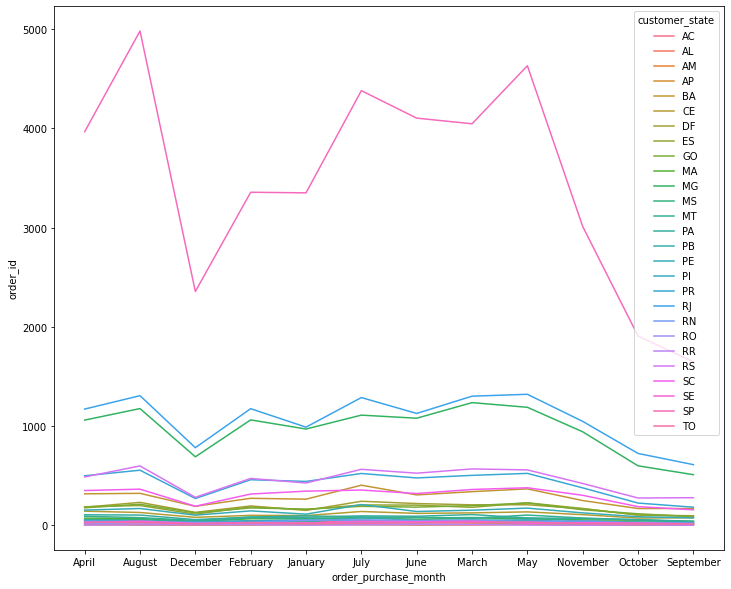

In [26]:
a4_dims = (12, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.lineplot(df_plt['order_purchase_month'],df_plt['order_id'],hue=df_plt['customer_state'],ax=ax)


/opt/conda/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:345: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


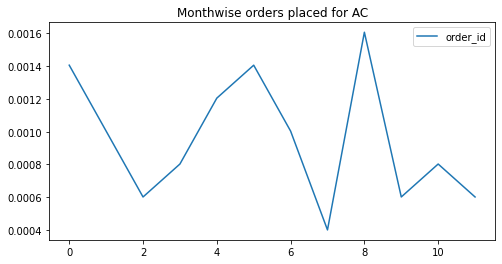

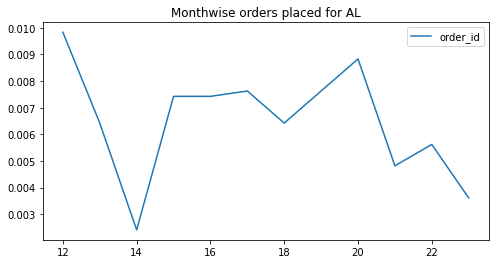

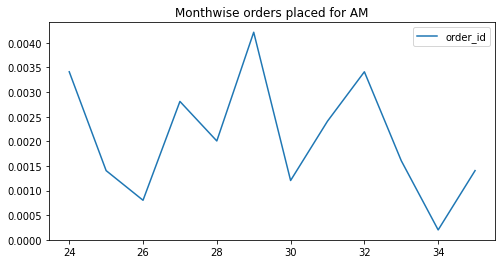

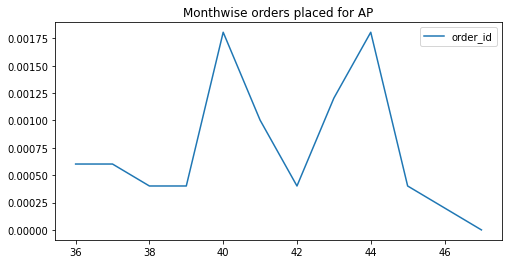

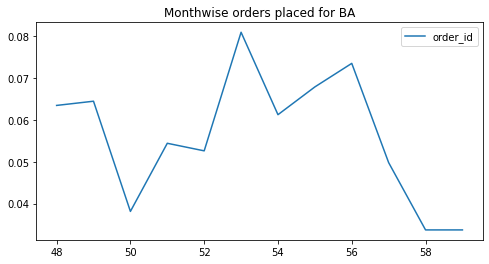

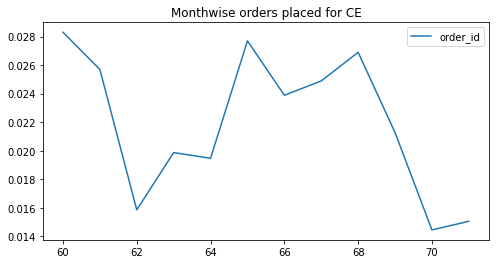

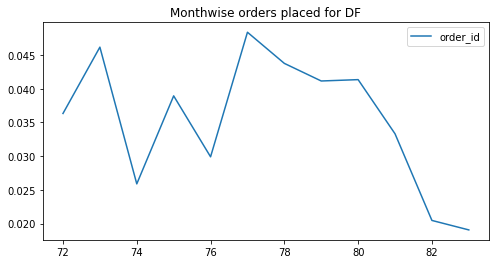

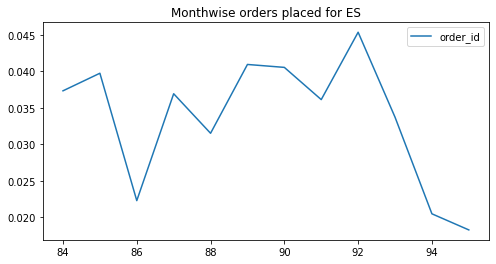

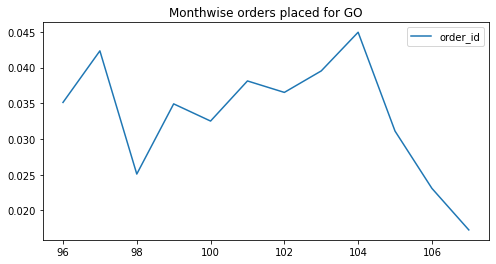

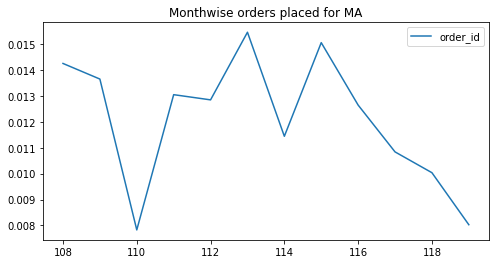

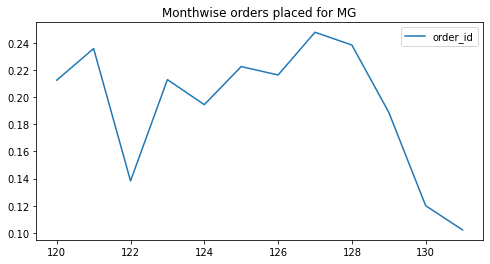

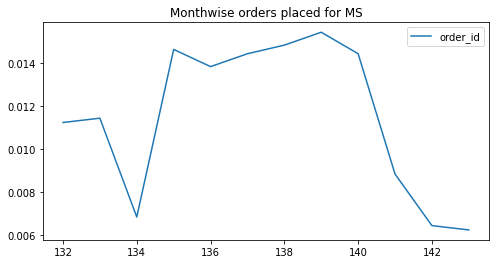

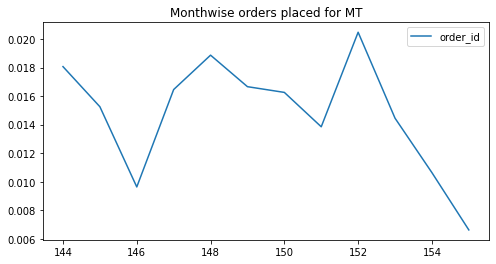

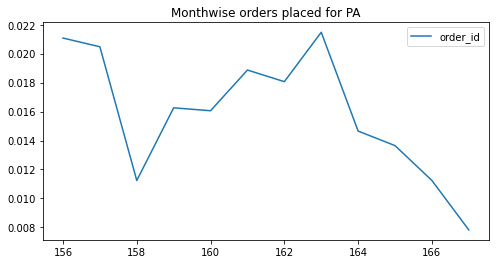

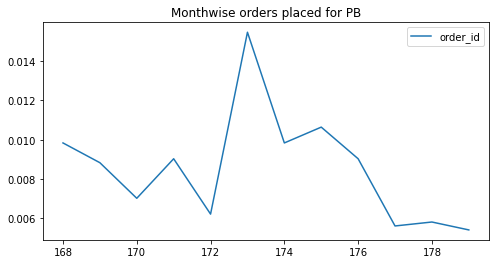

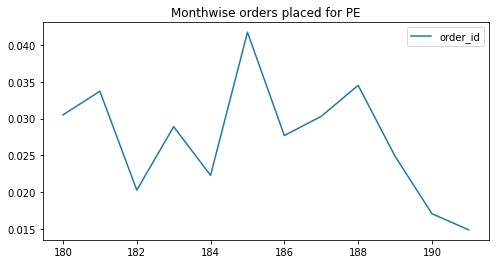

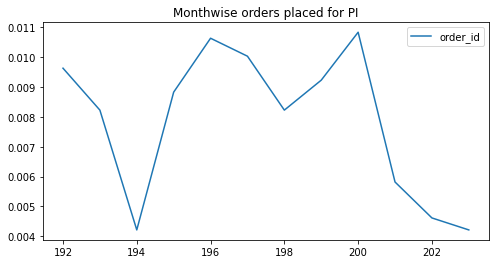

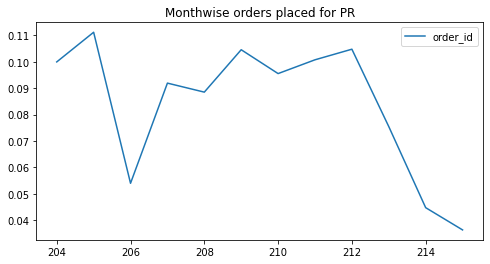

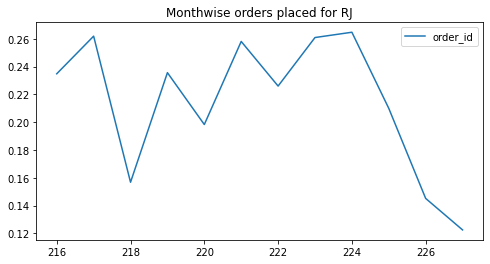

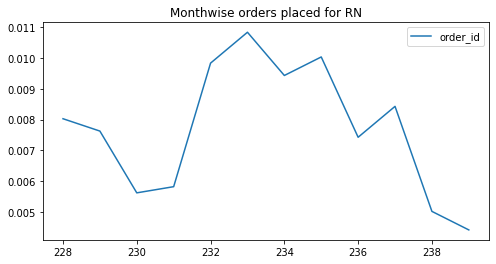

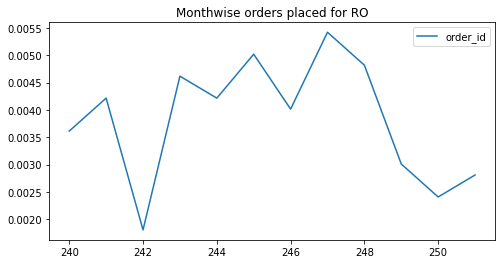

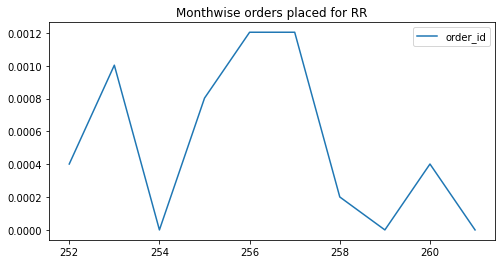

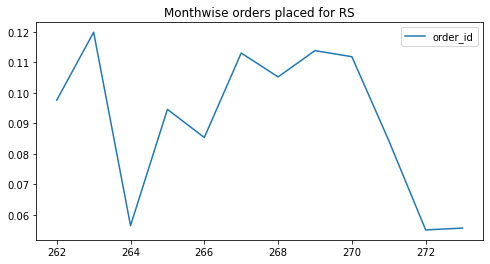

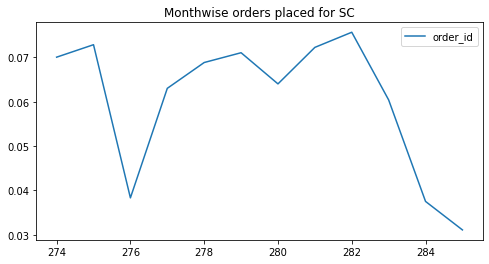

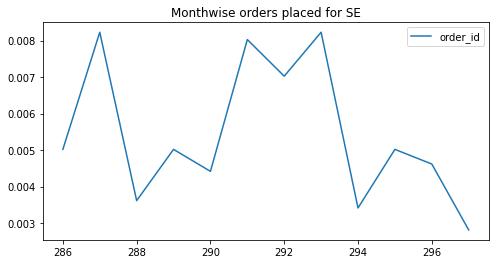

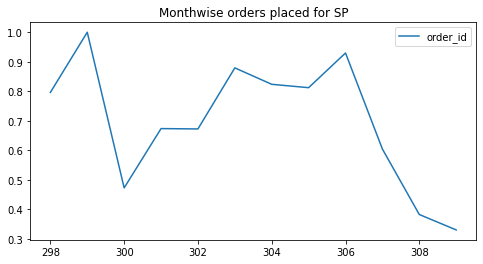

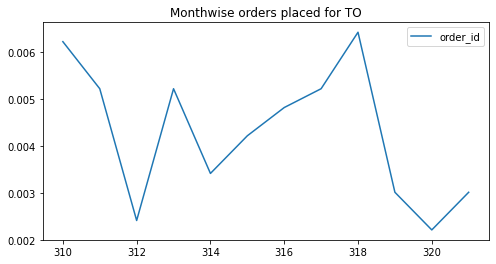

In [27]:
##Get month on month orders by region

df_plt = df_tmp.groupby(['customer_state','order_purchase_month']).count()['order_id'].reset_index().fillna(0)
df_plt['order_id'] = (df_plt['order_id'] - df_plt['order_id'].min())/df_plt['order_id'].max()
for i in df_plt['customer_state'].unique():
    df_plt[df_plt['customer_state'] == i].drop('customer_state',axis=1).plot(title="Monthwise orders placed for {}".format(i),figsize=(8,4))
    

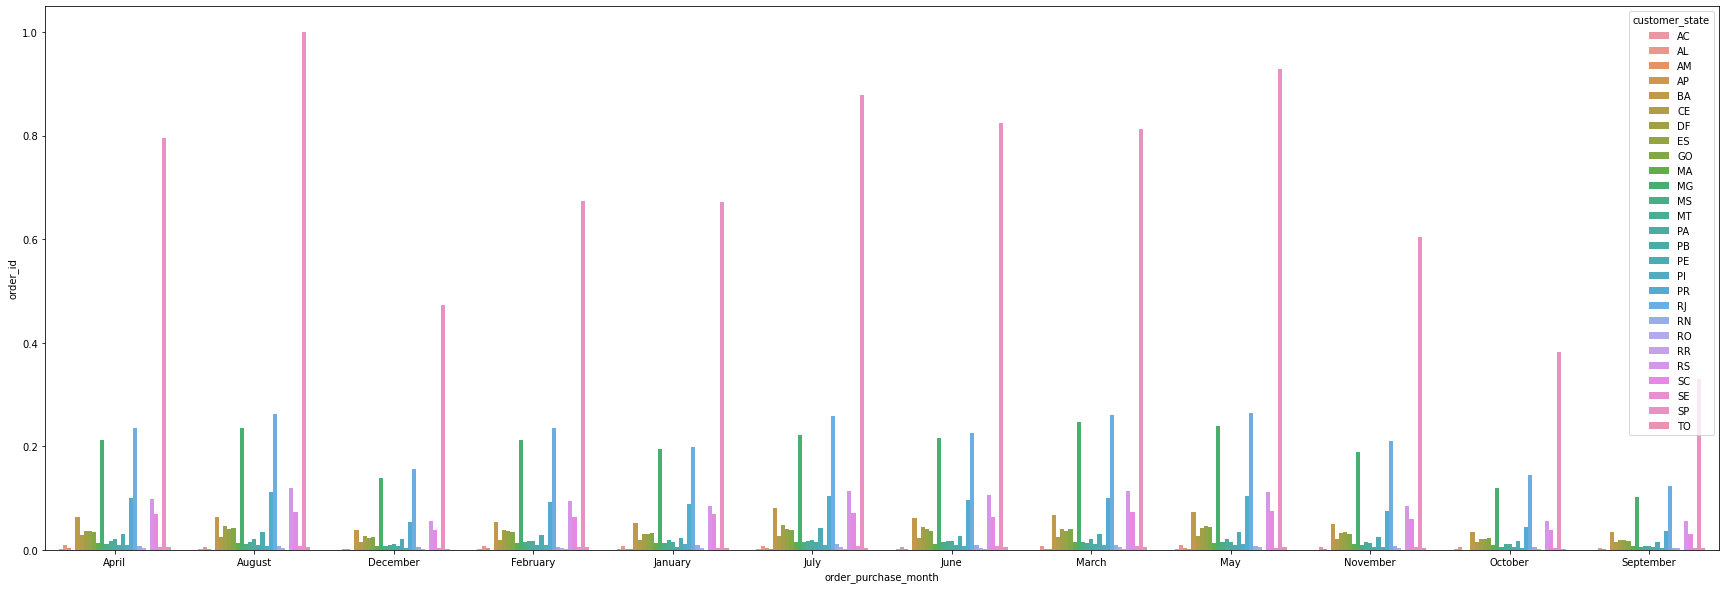

In [28]:
a4_dims = (30, 10)
fig, ax = plt.subplots(figsize=a4_dims)
sns.barplot(data=df_plt,x='order_purchase_month',y='order_id',hue='customer_state',ax=ax)
plt.show()

Answer: 'TO' State seems to be having highest number of orders, 'RJ' on second and 'MT' on third place.

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    Top 10 brazilian cities most no. of orders
    </p>
    </div>

<AxesSubplot:title={'center':'Top 10 City (sorted by number of orders palced)'}, xlabel='customer_city'>

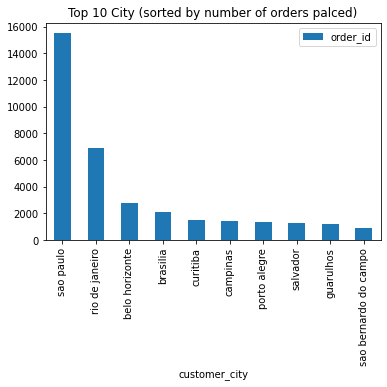

In [29]:
#Top 10 brazilian cities most no. of orders
df_plt = df_tmp.groupby(['customer_city']).count()['order_id'].reset_index().fillna(0).sort_values('order_id',ascending=False).head(10)
df_plt.plot(kind='bar',title="Top 10 City (sorted by number of orders palced)",x='customer_city')

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"> 
    How are customers distributed in Brazil?
    </p>
    </div>

In [30]:
##How are customers distributed in Brazil

df_customer_dist = df_customers.groupby('customer_state').count()['customer_id'].reset_index()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


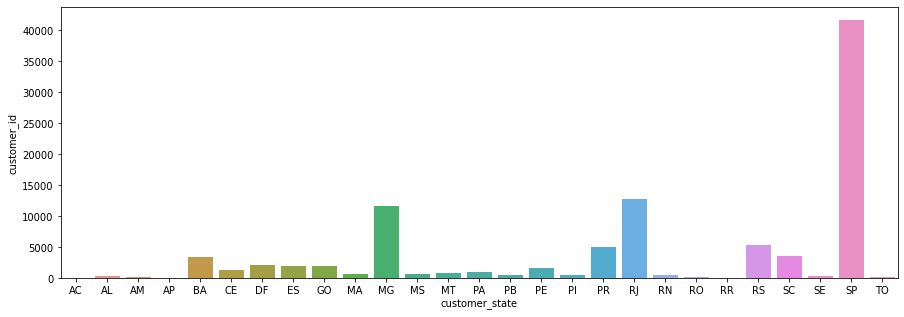

In [31]:
fig, ax =  plt.subplots(figsize=(15,5))
sns.barplot(df_customer_dist['customer_state'],df_customer_dist['customer_id'],ax =ax)

plt.show()

Answer: 'SP' has highest customers, 'RJ' on second and 'MG' on third.

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">Impact on Economy: Analyze the money movement of e-commerce by looking at order prices, freight and others

<sub>Get % increase in cost of orders from 2017 to 2018 (include months between Jan to Aug only)</sub>
    </p>
    </div>

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


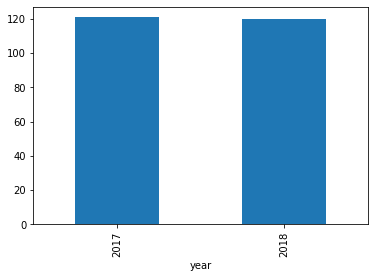

In [32]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_filtered_orders = df_orders[((df_orders['order_purchase_timestamp'].dt.year == 2017) | (df_orders['order_purchase_timestamp'].dt.year ==2018)) &  (df_orders['order_purchase_timestamp'].dt.month <9)]
df_filtered_orders['year'] = df_orders['order_purchase_timestamp'].dt.year
df_filtered_orders = df_filtered_orders.merge(df_order_items,on='order_id')
df_filtered_orders.groupby('year').mean()['price'].plot(kind='bar')
plt.show()

Answer: not much difference between two years

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positio

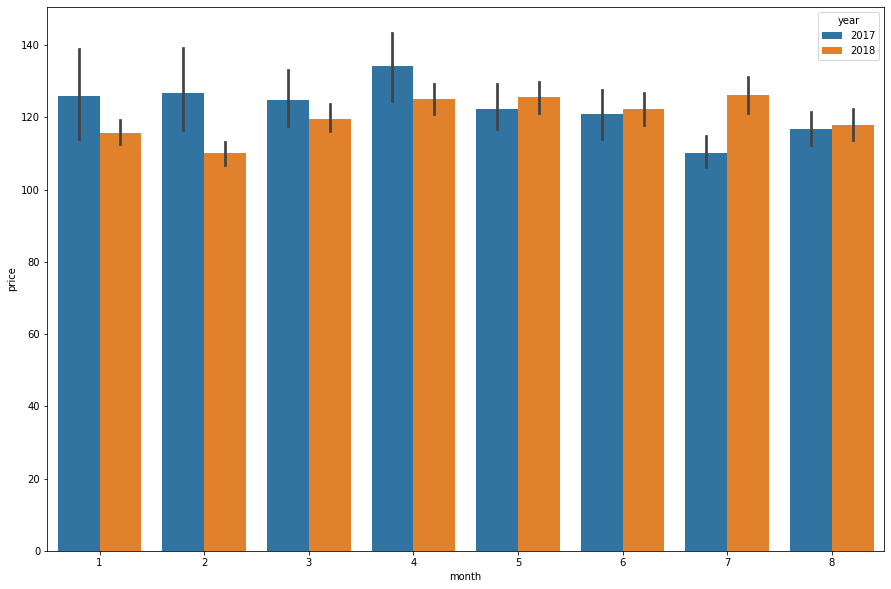

In [33]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_filtered_orders = df_orders[((df_orders['order_purchase_timestamp'].dt.year == 2017) | (df_orders['order_purchase_timestamp'].dt.year ==2018)) &  (df_orders['order_purchase_timestamp'].dt.month <9)]
df_filtered_orders['year'] = df_orders['order_purchase_timestamp'].dt.year
df_filtered_orders['month'] = df_orders['order_purchase_timestamp'].dt.month
df_filtered_orders = df_filtered_orders.merge(df_order_items,on='order_id')
df_filtered_orders.groupby(['year','month']).mean()['price'].reset_index()

fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(df_filtered_orders['month'],df_filtered_orders['price'],hue=df_filtered_orders['year'])
plt.show()

Answer: In first half of year, Sales seem to be less in 2018 while in later months sales is less in 2017.

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;"><sub>Mean & Sum of price and freight value by customer state</sub>
    </p>
    </div>

In [34]:
df_filtered_orders = df_filtered_orders.merge(df_customers,on='customer_id')

In [35]:
df_filtered_orders = df_filtered_orders.groupby('customer_state').agg({'freight_value':['sum','mean'],'order_id':'count'}).reset_index()

In [36]:
df_filtered_orders.columns = ['customer_state','freight_value__sum','freight_value__mean','order_id__count']

In [37]:
df_filtered_orders

,customer_state,freight_value__sum,freight_value__mean,order_id__count
0,AC,2617.40,37.391429,70
1,AL,12081.50,35.120640,344
2,AM,4520.13,33.236250,136
3,AP,2203.04,33.379394,66
4,BA,79236.50,27.247765,2908
5,CE,36594.15,33.328005,1098
6,DF,39148.89,21.265014,1841
7,ES,38558.53,22.313964,1728
8,GO,41014.45,23.172006,1770
9,MA,23042.20,38.149338,604


/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


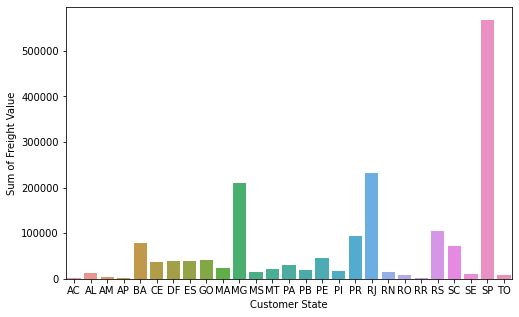

In [38]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_filtered_orders['customer_state'],df_filtered_orders['freight_value__sum'])
ax.set_xlabel("Customer State")
ax.set_ylabel("Sum of Freight Value")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


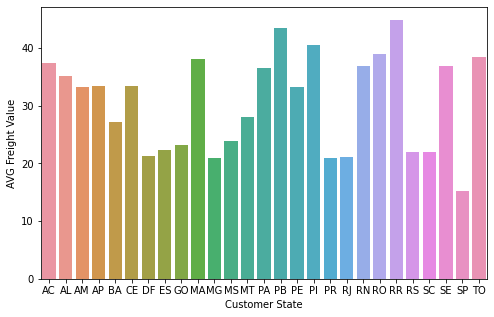

In [39]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_filtered_orders['customer_state'],df_filtered_orders['freight_value__mean'])
ax.set_xlabel("Customer State")
ax.set_ylabel("AVG Freight Value")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


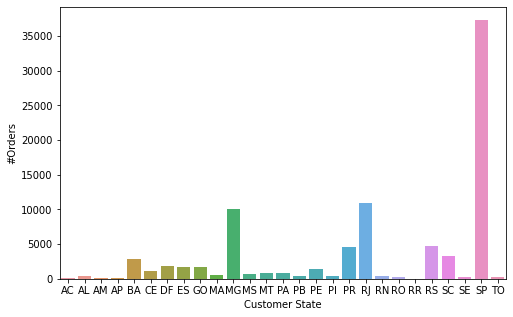

In [40]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_filtered_orders['customer_state'],df_filtered_orders['order_id__count'])
ax.set_xlabel("Customer State")
ax.set_ylabel("#Orders")
plt.show()

Answer: 
1. 'SP' has highest total freight value
2. 'RR', 'PA' has highest avg freight value
3. 'SP' has placed highest number of orders

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
  Analysis on sales, freight and delivery time  
    <br>
    <sub> Calculate days between purchasing, delivering and estimated delivery </sub>
     </p>
    </div>
    

    


In [41]:
df_orders['order_purchase_timestamp'] = pd.to_datetime(df_orders['order_purchase_timestamp'])
df_orders['order_delivered_customer_date'] = pd.to_datetime(df_orders['order_delivered_customer_date'])
df_orders['order_estimated_delivery_date'] = pd.to_datetime(df_orders['order_estimated_delivery_date'])
df_orders['time_to_delivery'] = (df_orders['order_delivered_customer_date'] - df_orders['order_purchase_timestamp']).dt.days
df_orders['diff_estimated_delivery'] = (df_orders['order_estimated_delivery_date'] - df_orders['order_delivered_customer_date']).dt.days

In [42]:
df_orders_cust = df_orders.merge(df_customers,on='customer_id')
df_orders_cust = df_orders_cust.merge(df_order_items,on='order_id')

In [43]:
df_orders_tat_mean = df_orders_cust.groupby('customer_state').mean()[['time_to_delivery','diff_estimated_delivery','price','freight_value']]

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


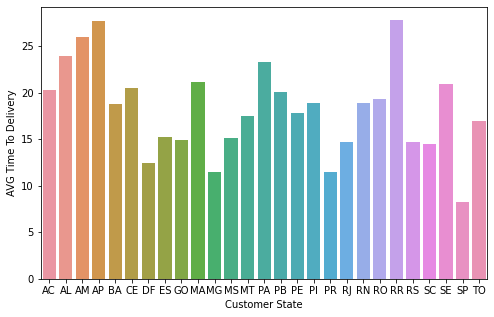

In [44]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_orders_tat_mean.index,df_orders_tat_mean['time_to_delivery'])
ax.set_xlabel("Customer State")
ax.set_ylabel("AVG Time To Delivery")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


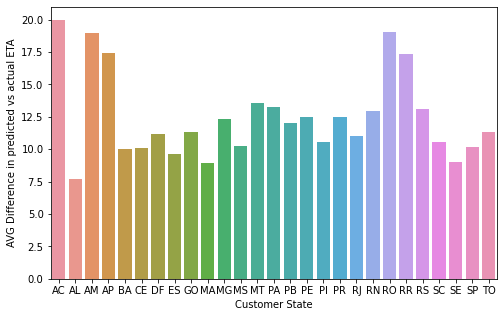

In [45]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_orders_tat_mean.index,df_orders_tat_mean['diff_estimated_delivery'])
ax.set_xlabel("Customer State")
ax.set_ylabel("AVG Difference in predicted vs actual ETA")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


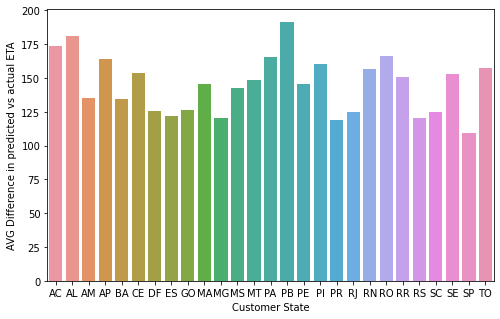

In [46]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_orders_tat_mean.index,df_orders_tat_mean['price'])
ax.set_xlabel("Customer State")
ax.set_ylabel("AVG Difference in predicted vs actual ETA")
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


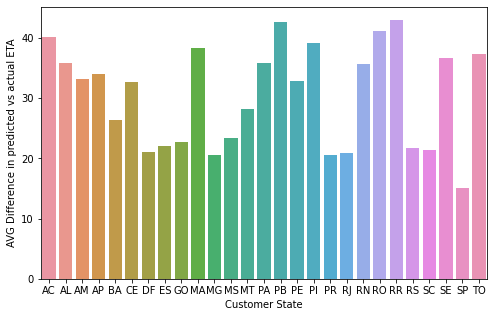

In [47]:
fig, ax = plt.subplots(figsize=(8,5))
sns.barplot(df_orders_tat_mean.index,df_orders_tat_mean['freight_value'])
ax.set_xlabel("Customer State")
ax.set_ylabel("AVG Difference in predicted vs actual ETA")
plt.show()

<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    <sub>
        Top 5 states with highest/lowest average freight value - sort in desc/asc limit 5
    </sub>
     </p>
    </div>
    

    




    



[]

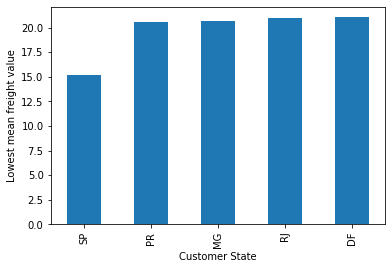

In [48]:
ax = df_orders_tat_mean.sort_values('freight_value')['freight_value'].head(5).plot(kind='bar')
ax.set_xlabel('Customer State')
ax.set_ylabel('Lowest mean freight value')
plt.plot()

[]

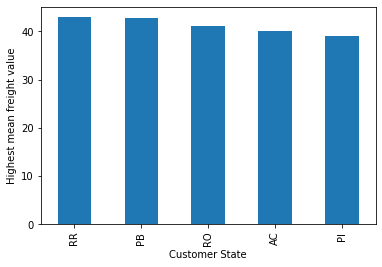

In [49]:
ax = df_orders_tat_mean.sort_values('freight_value',ascending=False)['freight_value'].head(5).plot(kind='bar')
ax.set_xlabel('Customer State')
ax.set_ylabel('Highest mean freight value')
ax.plot()


<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    <sub>
        Top 5 states with highest/lowest average time to delivery
    </sub>
     </p>
    </div>
    

    




    



[]

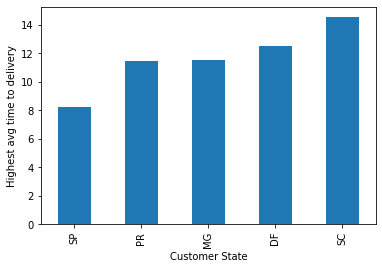

In [50]:
ax = df_orders_tat_mean.sort_values('time_to_delivery')['time_to_delivery'].head(5).plot(kind='bar')
ax.set_xlabel('Customer State')
ax.set_ylabel('Highest avg time to delivery')
ax.plot()

[]

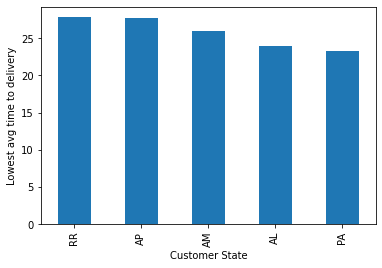

In [51]:
ax = df_orders_tat_mean.sort_values('time_to_delivery',ascending=False)['time_to_delivery'].head(5).plot(kind='bar')
ax.set_xlabel('Customer State')
ax.set_ylabel('Lowest avg time to delivery')
ax.plot()


<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    <sub>
        Top 5 states where delivery is really fast/ not so fast compared to estimated date
    </sub>
     </p>
    </div>
    

    




    




[]

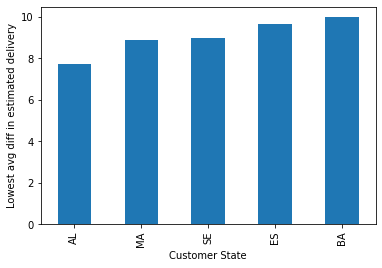

In [52]:
ax = df_orders_tat_mean.sort_values('diff_estimated_delivery')['diff_estimated_delivery'].head(5).plot(kind='bar')
ax.set_xlabel('Customer State')
ax.set_ylabel('Lowest avg diff in estimated delivery')
ax.plot()

[]

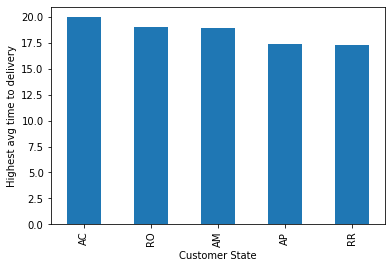

In [53]:
ax = df_orders_tat_mean.sort_values('diff_estimated_delivery',ascending=False)['diff_estimated_delivery'].head(5).plot(kind='bar')
ax.set_xlabel('Customer State')
ax.set_ylabel('Highest avg time to delivery')
ax.plot()


<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    <sub>
        Month over Month count of orders for different payment types
    </sub>
     </p>
    </div>
    

    




    




In [54]:
df_order_payment = df_orders[['order_id','order_purchase_timestamp']].merge(df_payments,on='order_id')

In [55]:
df_order_payment['order_purchase_timestamp'] = pd.to_datetime(df_order_payment['order_purchase_timestamp'])
df_order_payment['order_purchase_month_year'] = df_order_payment['order_purchase_timestamp'].dt.strftime('%Y-%m')

In [56]:
df_monthwise_payment_type = df_order_payment.groupby(['payment_type','order_purchase_month_year']).count()['order_id'].reset_index()

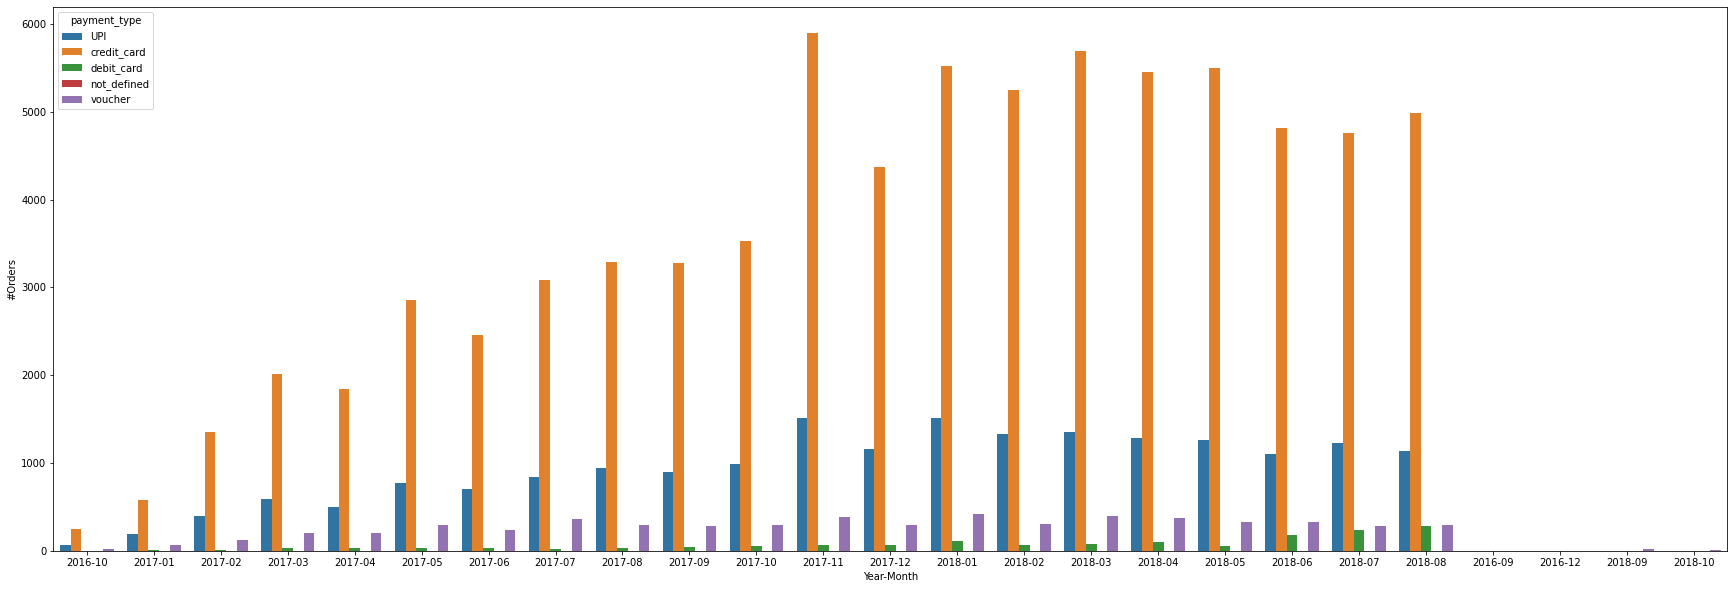

In [57]:
fig, ax = plt.subplots(figsize=(30, 10))
sns.barplot(data=df_monthwise_payment_type,x='order_purchase_month_year',y='order_id',hue='payment_type',ax=ax)
ax.set_xlabel('Year-Month')
ax.set_ylabel('#Orders')
plt.show()

Answer: Most frequently used payment type has been credit card, UPI on second place.


<div style="display:fill;
           border-radius:5px;
           background-color:#99ff99;
           font-size:110%;
           font-family:verdana;
           letter-spacing:0.5px">

<p style="padding: 10px;
              color:black;">
    <sub>
        Distribution of payment installments
    </sub>
     </p>
    </div>
    

    




    




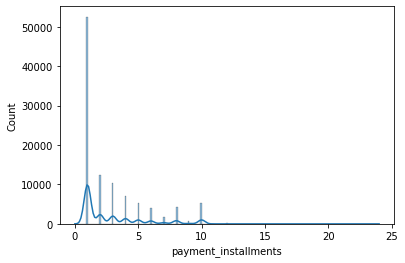

In [58]:
sns.histplot(df_payments.payment_installments, kde=True)
plt.show()

Answer: Most often slected payment installement is 1, i.e amount paid early on.
This tells us that ppl tend to pay off in smaller installments generally.

## Recommendations:

1. We should start offering credit card services i.e. ppl can get credit card with special offers from us.
2. People paying early on should be given some benefits, so that they get keep paying for item early on.
3. 'ES' and 'BA' has highest diff between estimated and actual ETA.
4. Need to check why Sales is lesser in first half of year in 2018 as compared to 2017.
5. There is a very high imbalance in number of customers from diff states, bad distribution route for delivery could be a reason, as SP has better connectivity.
